In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("haberman.csv") 

In [4]:
print(df.shape)

(306, 4)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observations

1. dataset has 4 features/variable and 305 data points.
2. dataset has a collection of data of patient aged between 30-83 years those who had undergone cancer surgery in year 1958-1969.
3. Almost 75% of the patient had 0-4 axil nodes where 25% of them had 0 node
4. 75% of people with age 60+ and 4+ axil nodes had died with in 5 years.
5. 50% has survivied having 1 or 0 nodes below 52 age.

In [13]:
#Datapoint per class.
#Surv_status: 1-survived 5 years or more,2-the patient died within 5 year

df["Surv_status"] = df["status"].apply(lambda x: "Patient Survived 5yrs or More " if x == 1 else "Died within 5 year")
df["Surv_status"].value_counts()

Patient Survived 5yrs or More     225
Died within 5 year                 81
Name: Surv_status, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


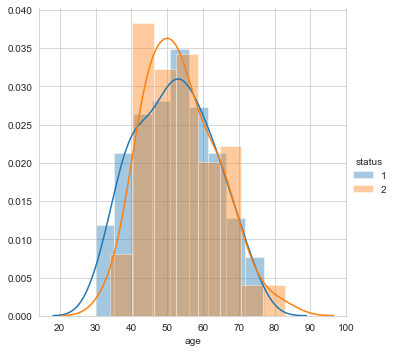

In [29]:
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


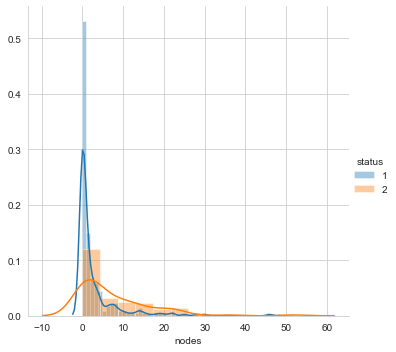

In [30]:
# Distribution for axil_ nodes of Operation 
sns.FacetGrid(df, hue="status", size=5)\
.map(sns.distplot, "nodes").add_legend();
plt.show();

# Observations:

1. It is seen that 95% of the patient has axil nodes between 0 to 25.
2. Patient with 0-3 axil node had higher chances of survival.

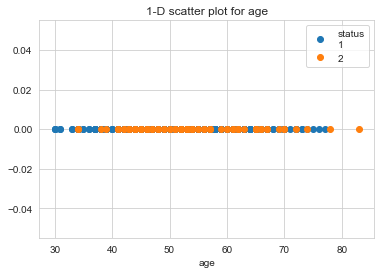

In [28]:
# 1-d scatter plot

one = df.loc[df["status"] == 1]
two = df.loc[df["status"] == 2]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "status\n" "1")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "2")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

In [ ]:
# Observation
# Many person died whose age was between 41-70.

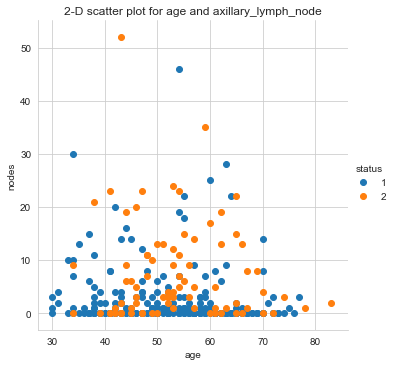

In [21]:
# 2d scatter plot 

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status", size = 5).map(plt.scatter, "age", "nodes").add_legend()
plt.title("2-D scatter plot for age and axillary_lymph_node")
plt.show()

In [23]:
# observation
# 1. In the above 2d scatter plot class label is not linearly seprable

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


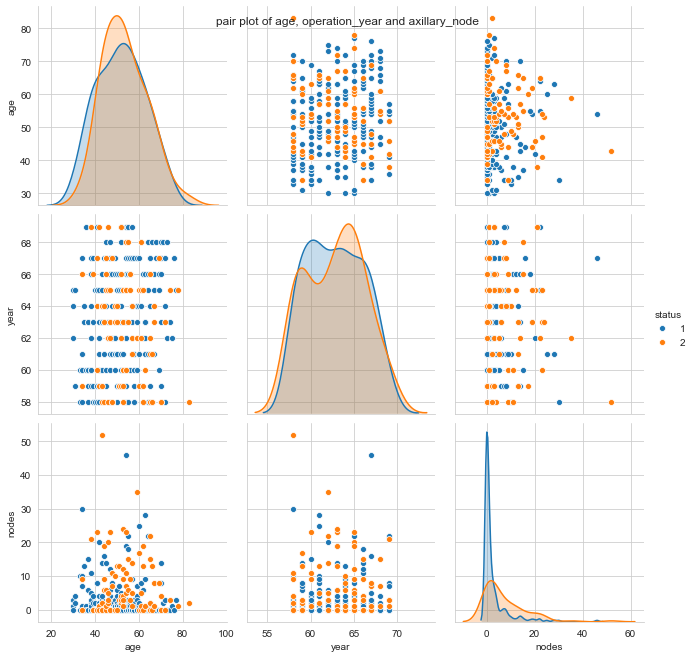

In [27]:
sns.set_style("whitegrid")
sns.pairplot(df, hue = "status", vars = ["age", "year", "nodes"], size = 3)
plt.suptitle("pair plot of age, operation_year and axillary_node")
plt.show()

In [ ]:
#no Useful info is Found